# Cancer Classification with Feature Selection

## Imports

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
# from sklearn.metrics import plot_confusion_matrix,plot_roc_curve
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
sc = StandardScaler()

In [ ]:
def evaluate_fn(Y_test,model_pred):
    # cm = confusion_matrix(Y_test.argmax(), model_pred.argmax())
    cm = confusion_matrix(Y_test.astype(int).tolist(), model_pred)

    True_Positives = cm[0][0]
    False_Positives = cm[0][1]

    True_Negetives = cm[1][1]
    False_Negetives = cm[1][0]

    # return True_Positives,False_Positives,False_Negetives,True_Negetives

    precision =  True_Positives / (True_Positives + False_Positives)
    recall = True_Positives / (True_Positives + False_Negetives)
    f1_score = 2*(precision * recall) / (precision + recall)

    return precision,recall,f1_score

## Working with Microarray Dataset

### Data Preparation For Microarray Dataset

In [ ]:
from scipy.io import arff
import pandas as pd

In [ ]:
data1 = arff.loadarff('/content/drive/MyDrive/Work Space/Breast.arff')
data1 = pd.DataFrame(data1[0])
data1.head()

,Contig45645_RC,Contig44916_RC,D25272,J00129,Contig29982_RC,Contig26811,D25274,Contig36292,Contig42854,Contig34839,...,NM_000898,NM_000899,Contig20164_RC,Contig8985_RC,Contig36062_RC,Contig35333_RC,Contig62037_RC,AF067420,Contig15167_RC,Class
0,-0.299,0.093,-0.215,-0.566,-0.596,-0.195,0.039,-0.409,-0.352,0.066,...,-0.960,-0.211,0.155,-0.095,-0.025,-0.037,0.215,0.307,0.321,b'relapse'
1,-0.081,0.009,-0.091,-0.518,-0.502,-0.149,0.098,-0.090,0.138,0.061,...,-0.531,-0.020,0.014,-0.123,0.148,0.024,-0.070,-0.209,0.105,b'relapse'
2,-0.125,0.070,-0.006,-0.575,-0.585,-0.183,0.102,0.023,-0.350,-0.005,...,-0.883,-0.159,0.022,0.006,-0.086,0.019,0.026,-0.822,0.199,b'relapse'
3,-0.270,0.123,0.056,-0.499,-0.402,-0.099,-0.145,-0.103,0.181,0.236,...,-0.044,-0.096,0.018,0.000,0.076,0.057,-0.016,-0.360,-0.038,b'relapse'
4,-0.141,0.025,-0.031,-0.465,-0.533,-0.065,0.101,-0.008,-0.019,0.026,...,0.280,-0.088,0.043,0.207,-0.124,-0.041,-0.077,-0.432,-0.015,b'relapse'


In [ ]:
data1.columns

Index(['Contig45645_RC', 'Contig44916_RC', 'D25272', 'J00129',
       'Contig29982_RC', 'Contig26811', 'D25274', 'Contig36292', 'Contig42854',
       'Contig34839',
       ...
       'NM_000898', 'NM_000899', 'Contig20164_RC', 'Contig8985_RC',
       'Contig36062_RC', 'Contig35333_RC', 'Contig62037_RC', 'AF067420',
       'Contig15167_RC', 'Class'],
      dtype='object', length=24482)

In [ ]:
# check for any null values
data1.isnull().sum()

Contig45645_RC    0
Contig44916_RC    0
D25272            0
J00129            0
Contig29982_RC    0
                 ..
Contig35333_RC    0
Contig62037_RC    0
AF067420          0
Contig15167_RC    0
Class             0
Length: 24482, dtype: int64

In [ ]:
data1["Class"].unique()

array([b'relapse', b'non-relapse'], dtype=object)

In [ ]:
print("Lenght of Dataset:", len(data1))
print("Num of columns:", len(data1.columns))

Lenght of Dataset: 97
Num of columns: 24482


<AxesSubplot:xlabel='Class', ylabel='count'>

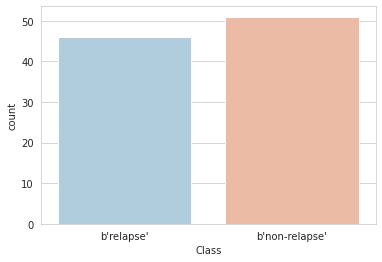

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x = 'Class', data= data1,palette = 'RdBu_r')

In [ ]:
# class values are in byte string format but we need them in integer format
# Converting them into string first
y = data1.Class  # label
# len(y)
# y[0]
def cvt(str):
  return str.decode("utf-8")

for st in range(len(y)):
  y[st] = cvt(y[st])
# print(y)

<ipython-input-11-2a7445fa7bd8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[st] = cvt(y[st])


In [ ]:
# Then convert them into integer
y.replace({"non-relapse": 0, "relapse": 1}, inplace= True)

In [ ]:
# y = y.astype(float)

In [ ]:
# grab our features
x = data1.drop(['Class'], axis=1)

In [ ]:
cols = (data1.columns).to_list()
len(cols)

24482

In [ ]:
# convert numpy array to dictionary
col_dict = dict(enumerate((x.columns.to_numpy()).flatten(), 0))
# col_dict

In [ ]:
len(col_dict)

24481

<a name='CorrelationMatrixPlot'></a>
#### **Correlation Matrix Plot**

We have 24482 features and if we try to draw a correlation matrix of it, then it will take us forever and even by doing so we can't able to understand any info from that gaint matrix. So we gonna take a sample(100) of features out of 24482 and draw the matrix. We gonna do the same for rest of the plots.

<AxesSubplot:>

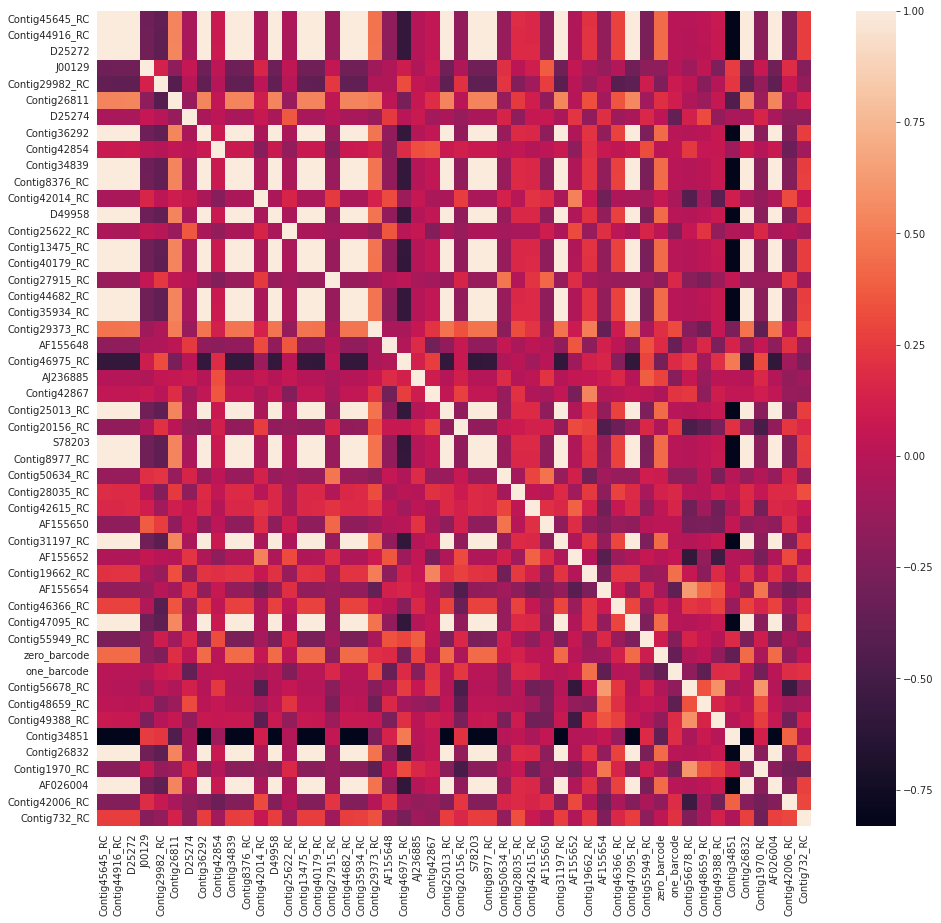

In [ ]:
data = data1[cols[:50]]
cor = data.corr()
plt.figure(figsize=(16,15))
sns.heatmap(cor)

If you gonna perform K-fold cross-validation then train-test split is not needed.

####**Train test split**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 58)
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_text: ",x_test.shape)
print("y_test: ",y_test.shape)

x_train shape:  (77, 24481)
y_train shape:  (77,)
x_text:  (20, 24481)
y_test:  (20,)


**Scale the data**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
# x_train = pd.Series(x_train)

### Wrapper Methods

### Using sklearn GA

In [ ]:
!pip install sklearn-genetic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 KB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 15.3 MB/s eta 0:00:00


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from genetic_selection import GeneticSelectionCV
from sklearn.svm import SVC

In [ ]:
estimators = DecisionTreeClassifier()
models = GeneticSelectionCV(
    estimators, cv=5, verbose=0,
    scoring="accuracy", max_features=1000,
    n_population=100, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=50,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)
models = models.fit(x, y)


In [ ]:
print('Feature Selection:', x.columns[models.support_])

Feature Selection: Index(['Contig20749_RC', 'Contig14924_RC', 'Contig35067_RC', 'AB033061',
       'AB033066', 'U20582', 'Contig33359_RC', 'NM_003009', 'NM_003024',
       'Contig15387_RC',
       ...
       'NM_001569', 'NM_000841', 'NM_000845', 'NM_018964', 'Contig29022_RC',
       'NM_001585', 'Contig36251', 'NM_000865', 'NM_000868', 'NM_000877'],
      dtype='object', length=680)


In [ ]:
new_fea =  x.columns[models.support_]
len(new_fea)

680

In [ ]:
new_x = x[new_fea]
x_train, x_valid, y_train, y_valid = train_test_split(new_x, y, test_size=0.20, random_state=101)
print("x_train", x_train.shape)
print("y_train", y_train.shape)
print("x_test", x_test.shape)
print("y_test", y_test.shape)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

x_train (77, 680)
y_train (77,)
x_test (20, 680)
y_test (20,)


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


<a name='cga'></a>
##### Correlation Matrix with feature selected by GA

<AxesSubplot:>

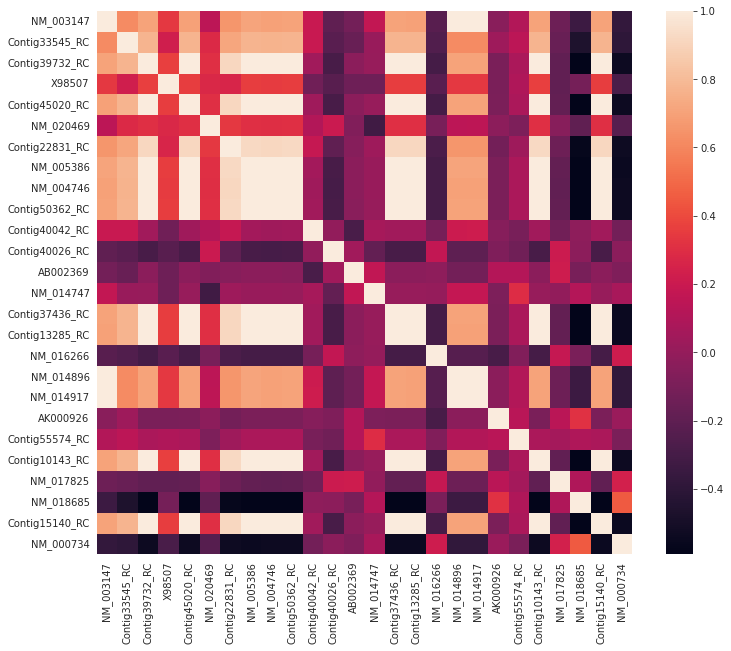

In [ ]:
cor = data1[new_fea].corr()
plt.figure(figsize=(12,10))
sns.heatmap(cor)

#### Using ML Classification Techniques

#####**Using SVM**

In [ ]:
model = SVC()
model.fit(x_train, y_train)
model_pred = model.predict(x_test)

[[7 5]
 [3 5]]


              precision    recall  f1-score   support

         0.0       0.70      0.58      0.64        12
         1.0       0.50      0.62      0.56         8

    accuracy                           0.60        20
   macro avg       0.60      0.60      0.60        20
weighted avg       0.62      0.60      0.60        20



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


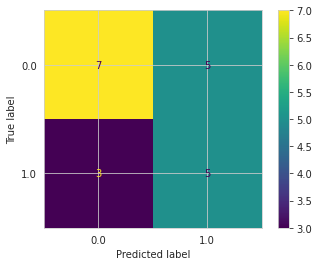

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
print(confusion_matrix(y_test,model_pred))
print('\n')
print(classification_report(y_test,model_pred))
plot_confusion_matrix(model, x_test, y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


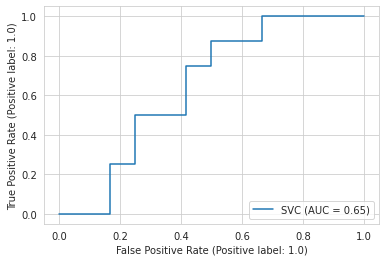

In [ ]:
# ROC curve
plot_roc_curve(model, x_test, y_test)

In [ ]:
# Calculate all
precision,recall,f1_score = evaluate_fn(y_test, model_pred)  # takes y_test and model pred
print("precision : ",precision,'\n',"recall :",recall,'\n',"f1_score :",f1_score)

precision :  0.5833333333333334 
 recall : 0.7 
 f1_score : 0.6363636363636365


#####**Using Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt.fit(x_train,y_train)
dt_pred = dt.predict(x_test)

[[9 3]
 [2 6]]


              precision    recall  f1-score   support

         0.0       0.82      0.75      0.78        12
         1.0       0.67      0.75      0.71         8

    accuracy                           0.75        20
   macro avg       0.74      0.75      0.74        20
weighted avg       0.76      0.75      0.75        20



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


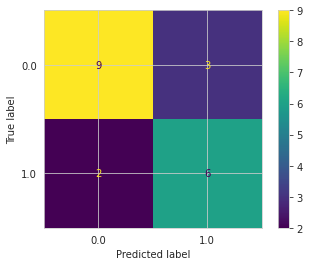

In [ ]:
print(confusion_matrix(y_test,dt_pred))
print('\n')
print(classification_report(y_test,dt_pred))

plot_confusion_matrix(dt, x_test, y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


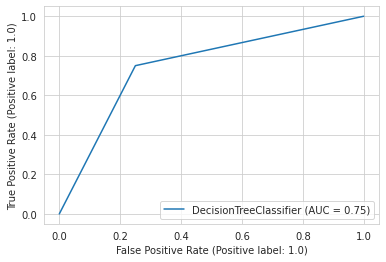

In [ ]:
# ROC curve
plot_roc_curve(dt, x_test, y_test)

In [ ]:
# Calculate all
precision,recall,f1_score = evaluate_fn(y_test, dt_pred)  # takes y_test and model pred
print("precision : ",precision,'\n',"recall :",recall,'\n',"f1_score :",f1_score)

precision :  0.75 
 recall : 0.8181818181818182 
 f1_score : 0.7826086956521738


#####**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[[12  0]
 [ 8  0]]


              precision    recall  f1-score   support

         0.0       0.60      1.00      0.75        12
         1.0       0.00      0.00      0.00         8

    accuracy                           0.60        20
   macro avg       0.30      0.50      0.37        20
weighted avg       0.36      0.60      0.45        20



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


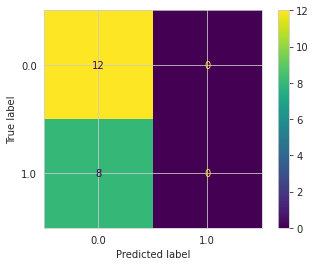

In [ ]:
# Plot the confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gnb, x_test, y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


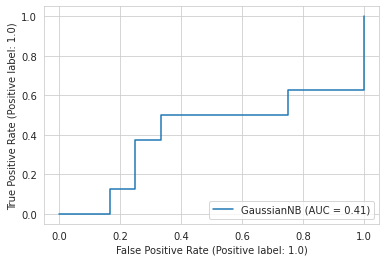

In [ ]:
# ROC curve
plot_roc_curve(gnb, x_test, y_test)

In [ ]:
# Calculate all
precision,recall,f1_score = evaluate_fn(y_test, y_pred)  # takes y_test and model pred
print("precision : ",precision,'\n',"recall :",recall,'\n',"f1_score :",f1_score)

precision :  1.0 
 recall : 0.6 
 f1_score : 0.7499999999999999


#####**Using LDA**

[[8 4]
 [2 6]]


              precision    recall  f1-score   support

         0.0       0.80      0.67      0.73        12
         1.0       0.60      0.75      0.67         8

    accuracy                           0.70        20
   macro avg       0.70      0.71      0.70        20
weighted avg       0.72      0.70      0.70        20

precision :  0.6666666666666666 
 recall : 0.8 
 f1_score : 0.7272727272727272




/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


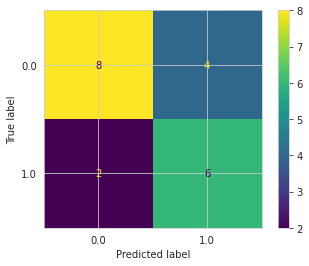

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(x_train,y_train)
lda_pred = lda.predict(x_test)

print(confusion_matrix(y_test,lda_pred))
print('\n')
print(classification_report(y_test,lda_pred))
plot_confusion_matrix(lda, x_test, y_test)


# Calculate all
precision,recall,f1_score = evaluate_fn(y_test, lda_pred)  # takes y_test and model pred
print("precision : ",precision,'\n',"recall :",recall,'\n',"f1_score :",f1_score)
print('\n')

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


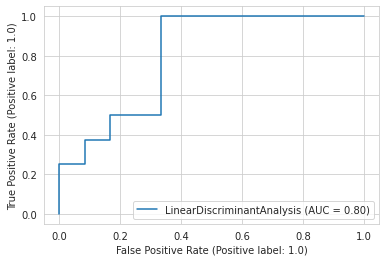

In [ ]:
# ROC curve
plot_roc_curve(lda, x_test, y_test)

### Using Hybrid GWO

In [ ]:
%cd "/content/drive/MyDrive/Work Space"

/content/drive/MyDrive/Work Space


In [ ]:
from FS.GWOJA import jfs

In [ ]:

# grab our features
new_y = y.values
x = data1.drop(['Class'], axis=1)
x = x.to_numpy()
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, new_y, test_size = 0.2, random_state = 58)
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_text: ",x_test.shape)
print("y_test: ",y_test.shape)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

x_train shape:  (77, 24481)
y_train shape:  (77,)
x_text:  (20, 24481)
y_test:  (20,)


In [ ]:

# parameter
k    = 5     # k-value in KNN
N    = 10    # number of chromosomes
T    = 100   # maximum number of generations
CR   = 0.8
MR   = 0.01
fold = {'xt':x_train, 'yt':y_train, 'xv':x_test, 'yv':y_test}
opts = {'k':k, 'fold':fold, 'N':N, 'T':T, 'CR':CR, 'MR':MR}

In [ ]:
# Check for types of x and y wheather they are numpy.ndarray or not

print(type(x))
print(type(new_y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
fmdl = jfs(x, new_y, opts)
sf   = fmdl['sf']

Iteration: 1
Best (GWO): 0.25247773783750665
Iteration: 2
Best (GWOJA): 0.20276900453412847
Iteration: 3
Best (GWOJA): 0.2025978513949593
Iteration: 4
Best (GWOJA): 0.20234050896613695
Iteration: 5
Best (GWOJA): 0.20211666190106609
Iteration: 6
Best (GWOJA): 0.2019773702054654
Iteration: 7
Best (GWOJA): 0.2018977165965442
Iteration: 8
Best (GWOJA): 0.20180989338670802
Iteration: 9
Best (GWOJA): 0.20171267513581959
Iteration: 10
Best (GWOJA): 0.20157705976063064
Iteration: 11
Best (GWOJA): 0.15195369878681428
Iteration: 12
Best (GWOJA): 0.1518626077366121
Iteration: 13
Best (GWOJA): 0.1517049344389527
Iteration: 14
Best (GWOJA): 0.15162405538989424
Iteration: 15
Best (GWOJA): 0.15152602017891428
Iteration: 16
Best (GWOJA): 0.15147005841264657
Iteration: 17
Best (GWOJA): 0.15137324864180388
Iteration: 18
Best (GWOJA): 0.15132545647645115
Iteration: 19
Best (GWOJA): 0.15128583391201342
Iteration: 20
Best (GWOJA): 0.15118820718107923
Iteration: 21
Best (GWOJA): 0.15109629917078554
Iteratio

In [ ]:
# model with selected features
num_train = np.size(x_train, 0)
num_valid = np.size(x_test, 0)
x_train   = x_train[:, sf]
y_train   = y_train.reshape(num_train)
x_valid   = x_test[:, sf]
y_valid   = y_test.reshape(num_valid)

In [ ]:
f = fmdl['sf']
print("Lenght of features: ", len(f))
# featching features
features = []
for key, val in col_dict.items():
  if key in f:
    features.append(col_dict.get(key))
cor = data1[features].corr()
#plt.figure(figsize=(15,16))
# uncomment this if you want to plot
# sns.heatmap(cor)

Lenght of features:  4070


### LSTM model

In [ ]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input
from tensorflow.keras import regularizers

In [ ]:
!pip install keras-self-attention

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for keras-self-attention: filename=keras_self_attention-0.51.0-py3-none-any.whl size=18913 sha256=175af0665ddab84288d7f5bbc2351abf0d461d3af352ffb8b2c282933e00d0c3
  Stored in directory: /root/.cache/pip/wheels/78/c1/84/b83a2fd6f1d63e136cba74bac4126bee3b8705eef6486635fd
Successfully built keras-self-attention


In [ ]:
from keras_self_attention import SeqSelfAttention
from tensorflow.keras.layers import Bidirectional,Flatten

In [ ]:
# # Model

# data = Input((x_train.shape[1],1),dtype= 'float32')

# X = LSTM(512,return_sequences =True,activity_regularizer=regularizers.L2(0.001))(data)
# X = Dropout(0.5)(X)
# X = LSTM(256,return_sequences = True)(X)
# X = Dropout(0.5)(X)
# X = LSTM(128,return_sequences = True)(X)
# X = LSTM(64,return_sequences = True)(X)
# X = Dropout(0.2)(X)
# X = LSTM(32,return_sequences = True)(X)
# X = LSTM(16,return_sequences = False)(X)
# X = Dense(units=4)(X)
# X = Dense(units=2)(X)
# # use sigmoid
# X = Activation('sigmoid')(X)   # sigmoid is for binary classification and softmax for multiclass classification.
# lstm = Model(data, X)

In [ ]:
data = Input((x_train.shape[1],1),dtype= 'float32')

X = Bidirectional(LSTM(64,return_sequences = True, name="LSTM_1"))(data)
X = Dropout(0.3)(X)

att = SeqSelfAttention(attention_type=SeqSelfAttention.ATTENTION_TYPE_MUL,
                       kernel_regularizer=regularizers.l2(1e-6),
                       bias_regularizer=regularizers.l1(1e-6),
                       attention_regularizer_weight=1e-6,
                       name='Attention')(X)
X = Dropout(0.7)(X)
flat_layer = Flatten()(att)
X = Dense(units=12, name="Dense_1")(flat_layer)
X = Dense(units=2, name="Output_layer")(X)

X = Activation('sigmoid')(X)   # sigmoid is for binary classification and softmax for multiclass classification.
lstm = Model(data, X)

In [ ]:
# lstm.set_weights("/content/drive/MyDrive/Work Space/Breast_cancer_varient_selfAttention_weights_R2.h5")

In [ ]:
lstm.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 4070, 1)]         0         
                                                                 
 bidirectional_3 (Bidirectio  (None, 4070, 128)        33792     
 nal)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 4070, 128)         0         
                                                                 
 Attention (SeqSelfAttention  (None, 4070, 128)        16385     
 )                                                               
                                                                 
 flatten_3 (Flatten)         (None, 520960)            0         
                                                                 
 Dense_1 (Dense)             (None, 12)                6251

In [ ]:
# from tensorflow import keras
# lstm = keras.models.load_model('/content/drive/MyDrive/Work Space/breastCancer_lstm_hybrid_gwo.h5')

In [ ]:
optimizer = Adam(learning_rate= 0.0001,clipvalue=0.5)
lstm.compile(optimizer=optimizer, loss= 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
def scheduler(epoch, lr):
  if epoch < 20:
    return lr
  else:
    return lr * tf.math.exp(-0.1)
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [ ]:
# fun for converting our target to one_hot vectior format.
def convert_to_one_hot(Y, C):  # Y - target column and C- is the number of classes(here its is 2).
    Y = np.eye(C)[Y.reshape(-1)]
    return Y

In [ ]:
# While using GA
#Y_train = y_train.to_numpy() # Y_train is series here so we converted into numpy array
# Y_train_oh = convert_to_one_hot(Y_train.astype("int64"),2)  # one_hot vec format

# While using Hybrid GWO
Y_train_oh = convert_to_one_hot(y_train.astype("int64"),2)  # one_hot vec format

In [ ]:
# Y_test_oh = tf.one_hot(y_test.to_numpy(), 2)

# While using GA
# Y_valid = y_valid.to_numpy()
# Y_test_oh = convert_to_one_hot(_valid.astype("int64"),2)

# WHILE USING HybridGWO
Y_test_oh = convert_to_one_hot(y_valid.astype("int64"),2)

In [ ]:
print(x_train.shape)
print(Y_train_oh.shape)

(77, 4070)
(77, 2)


In [ ]:
hist_gwo = lstm.fit(x_train, Y_train_oh, epochs= 100,validation_data=(x_valid,Y_test_oh),
                    batch_size = 7,callbacks=[callback], shuffle=True, verbose = 2)

Epoch 1/100
11/11 - 23s - loss: 0.0076 - accuracy: 1.0000 - val_loss: 1.5369 - val_accuracy: 0.7500 - lr: 1.0000e-04 - 23s/epoch - 2s/step
Epoch 2/100
11/11 - 16s - loss: 0.0082 - accuracy: 1.0000 - val_loss: 1.5882 - val_accuracy: 0.7500 - lr: 1.0000e-04 - 16s/epoch - 1s/step
Epoch 3/100
11/11 - 18s - loss: 0.0090 - accuracy: 1.0000 - val_loss: 1.6287 - val_accuracy: 0.7500 - lr: 1.0000e-04 - 18s/epoch - 2s/step
Epoch 4/100
11/11 - 17s - loss: 0.0064 - accuracy: 1.0000 - val_loss: 1.6053 - val_accuracy: 0.7500 - lr: 1.0000e-04 - 17s/epoch - 2s/step
Epoch 5/100
11/11 - 16s - loss: 0.0064 - accuracy: 1.0000 - val_loss: 1.6196 - val_accuracy: 0.7500 - lr: 1.0000e-04 - 16s/epoch - 1s/step
Epoch 6/100
11/11 - 16s - loss: 0.0068 - accuracy: 1.0000 - val_loss: 1.6807 - val_accuracy: 0.7500 - lr: 1.0000e-04 - 16s/epoch - 1s/step
Epoch 7/100
11/11 - 17s - loss: 0.0143 - accuracy: 1.0000 - val_loss: 1.7804 - val_accuracy: 0.7500 - lr: 1.0000e-04 - 17s/epoch - 2s/step
Epoch 8/100
11/11 - 18s - l

In [ ]:
lstm.save("Breast_cancer_varient_selfAttention_model_R6.h5")
lstm.save_weights("Breast_cancer_varient_selfAttention_weights_R6.h5")

In [ ]:
# Load model for re-training
model_path = "/content/drive/MyDrive/Work Space/Breast_cancer_varient_selfAttention_model_R6.h5"
lstm = tf.keras.models.load_model(model_path, custom_objects=SeqSelfAttention.get_custom_objects())
#compile the model
optimizer = Adam(learning_rate= 0.0001,clipvalue=0.5)
lstm.compile(optimizer=optimizer, loss= 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
print(hist_gwo.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


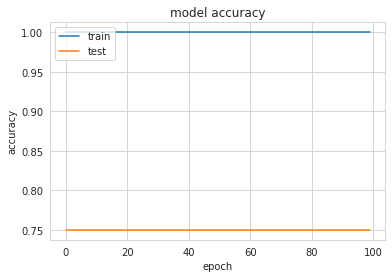

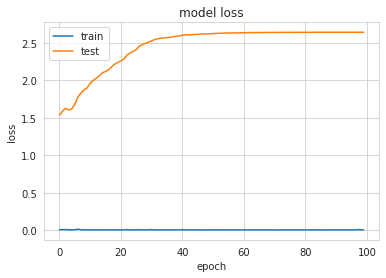

In [ ]:
# summarize history for accuracy
plt.plot(hist_gwo.history['accuracy'])
plt.plot(hist_gwo.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist_gwo.history['loss'])
plt.plot(hist_gwo.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Y_test_oh = tf.one_hot(y_test.to_numpy(), 2)
# Y_test_oh = convert_to_one_hot(y_valid.astype("int64"),2)

In [ ]:
lstm.evaluate(x_valid,Y_test_oh,batch_size=7)

3/3 [==============================] - 1s 467ms/step - loss: 2.6428 - accuracy: 0.7500


[2.6427886486053467, 0.75]

In [ ]:
lstm.save("/content/drive/MyDrive/Work Space/breastCancer_lstm_hybrid_gwo.h5")

# Graphs

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
cls = pd.read_excel("Classifier.xlsx")
wrap = pd.read_excel("wrapper.xlsx")
filt = pd.read_excel("Filters.xlsx")
cls.head()

,Classifier,Accuracy
0,SVM,1.000000
1,DT,1.000000
2,NB,0.656863
3,LDA,0.903045


In [ ]:
wrap.drop(['Unnamed: 3', 'Unnamed: 4'], axis= 1, inplace=True)

In [ ]:
wrap.head()

,Classifier,Accuracy,Methods
0,SVM,0.930556,GA
1,DT,0.972222,GA
2,NB,0.931169,GA
3,LDA,0.875000,GA
4,SVM,0.946429,PSO


In [ ]:
filt.drop(['Unnamed: 3'], axis= 1, inplace=True)
filt.head()

,Classifier,Accuracy,Method
0,SVM,1.000000,Chi2
1,DT,1.000000,Chi2
2,NB,0.904882,Chi2
3,LDA,0.970385,Chi2
4,SVM,1.000000,IG


## Finding highest of both(wrapper & Filters)

### Wrapper

In [ ]:
# full_wrap = wrap.loc[wrap['Accuracy'] >= 0.98]
# full_wrap
data = {
    "Classifier": ["DT","NB","NB","NB","NB"],
    "Accuracy": [0.972222222222222,1,1,0.9875,0.973214285714285],
    "Method": ["GA","PSO","JAYA","GWO","GWO+JAYA"]
}

res = pd.DataFrame(data)
res

,Classifier,Accuracy,Method
0,DT,0.972222,GA
1,NB,1.000000,PSO
2,NB,1.000000,JAYA
3,NB,0.987500,GWO
4,NB,0.973214,GWO+JAYA


### Plots(Wrappers)

<Axes: xlabel='Method', ylabel='Accuracy'>

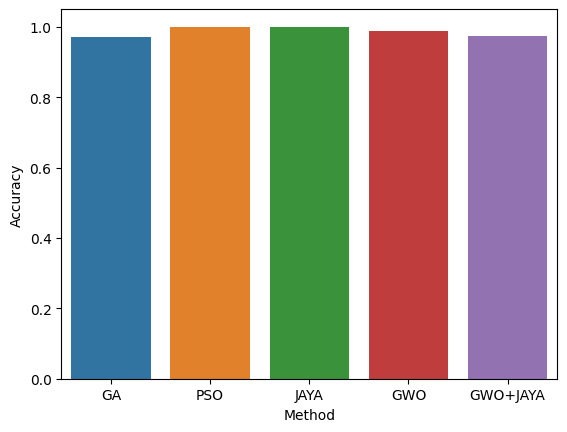

In [ ]:
sns.barplot(x="Method" , y = "Accuracy", data=res)

Jaya and PSO reched highest accuracy. Don't confuse with accuracy 1 because it's may because of overfitting issue.

<Axes: xlabel='Classifier', ylabel='Accuracy'>

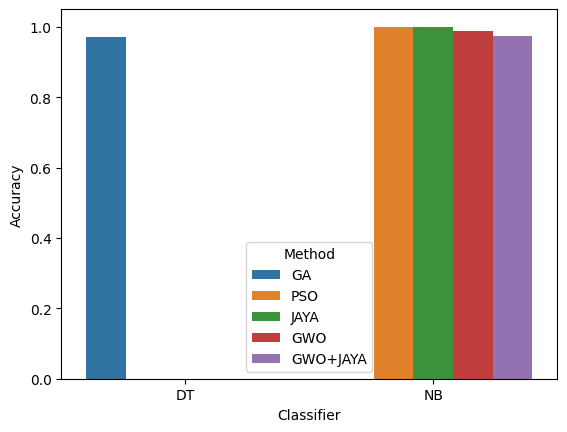

In [ ]:
sns.barplot(x="Classifier" , y = "Accuracy", data=res, hue="Method")

As you can see both POS and Jaya with Naive Bayes classifier have highest accuracy.

### Filter

In [ ]:
data2 = {
    "Classifier": ["SVC","LDA","SVC","SVC","LDA"],
    "Accuracy": [0.9875, 0.985714285714285, 0.9875, 0.9875, 1],
    "Method": ["CHI2","IG","RELIEF","MRMR","COMBINED"]
}

res2 = pd.DataFrame(data2)
res2

,Classifier,Accuracy,Method
0,SVC,0.987500,CHI2
1,LDA,0.985714,IG
2,SVC,0.987500,RELIEF
3,SVC,0.987500,MRMR
4,LDA,1.000000,COMBINED


### Plots(Filters)

<Axes: xlabel='Method', ylabel='Accuracy'>

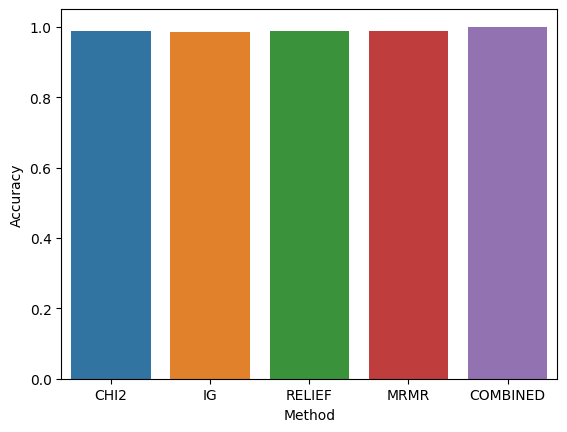

In [ ]:
sns.barplot(x="Method" , y = "Accuracy", data=res2)

Can see combination of all filters gives a better accuracy here.

<Axes: xlabel='Classifier', ylabel='Accuracy'>

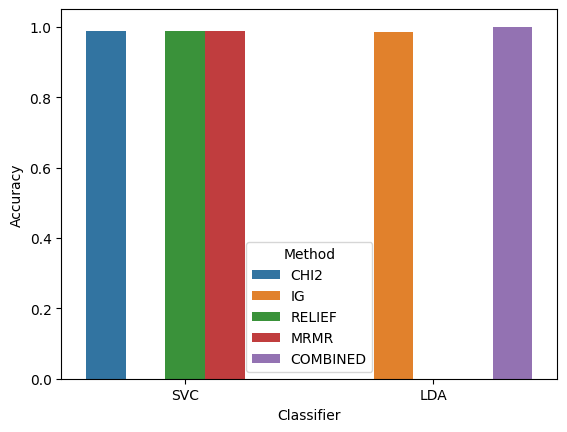

In [ ]:
sns.barplot(x="Classifier" , y = "Accuracy", data=res2, hue="Method")

Combination of all filters gives better accuracy with LDA classifier.

## Filters

<Axes: xlabel='Method', ylabel='Accuracy'>

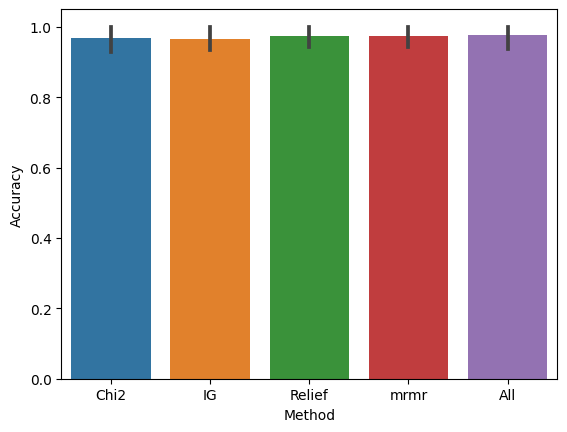

In [ ]:
sns.barplot(x="Method" , y = "Accuracy", data=filt)

You can see all the filters reached the higher accuracy.<br>
lets see which one of classifiers reached the highest.

<Axes: xlabel='Classifier', ylabel='Accuracy'>

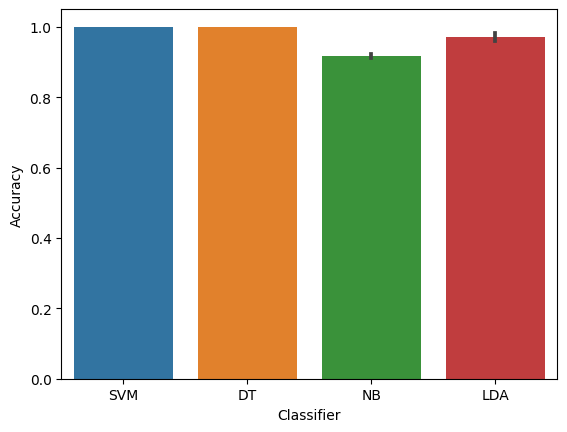

In [ ]:
sns.barplot(x="Classifier" , y = "Accuracy", data=filt)

Can see **Decision Tree** and **Support Vactor Classifier** taking the lead followed by **Linear Discriminant Analysis** and **Naive Bayes**.

<Axes: xlabel='Method', ylabel='Accuracy'>

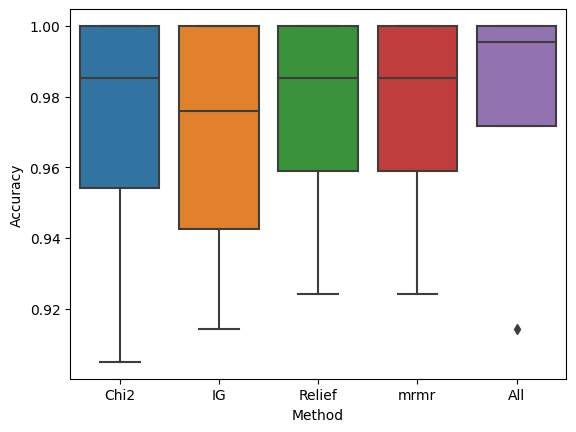

In [ ]:
sns.boxplot(x= "Method", y= "Accuracy", data= filt)

Can see here almost every filters reaching highest accuracy talking about minimum IG got a minimum of 0.914141 percent.

## Normal Classifiers

<Axes: xlabel='Classifier', ylabel='Accuracy'>

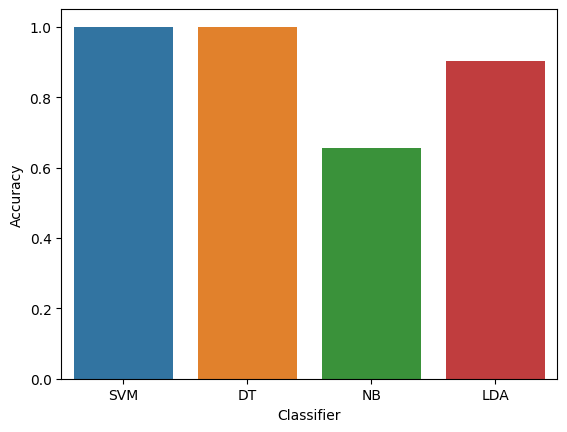

In [ ]:
sns.barplot(x = "Classifier", y="Accuracy", data=cls)

As we can see here both SVC and Decision Tree taking the lead. As the dataset bit short you can see some irregularity and unstablity result.

## Wrapper Methods

<Axes: xlabel='Methods', ylabel='Accuracy'>

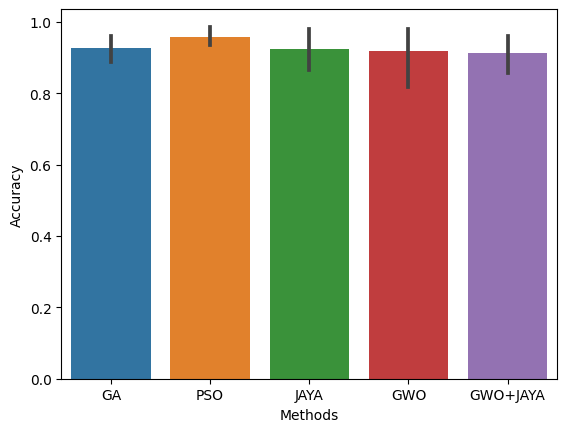

In [ ]:
sns.barplot(x="Methods", y = "Accuracy", data=wrap)

<Axes: xlabel='Classifier', ylabel='Accuracy'>

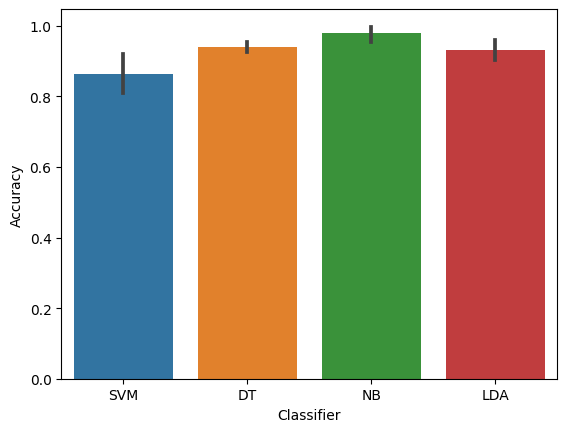

In [ ]:
sns.barplot(x="Classifier", y = "Accuracy", data=wrap)

# Great Job!!